# Reading a NetCDF file using xarray


NetCDF (Network Common Data Form) is a set of software libraries and machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data. It is also a community standard for sharing scientific data. Please go to https://www.unidata.ucar.edu/software/netcdf/ for more information. </br>


### xarray </br>
N-D labeled arrays and datasets in Python </br>

Xarray is a Python package that makes working with labelled multi-dimensional arrays simple, efficient, and fun!
More information in http://xarray.pydata.org/en/stable/index.html .

#### DataArray </br>
xarray.DataArray is an implementation of a labelled, multi-dimensional array for a single variable: </br>
values: a numpy.ndarray holding the array’s values </br>
dims: dimension names for each axis (e.g., ('lat', 'lon', 'z', 'time')) </br>
coords: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dim arrays of numbers, DateTime objects, or strings) </br>
attrs: an OrderedDict to hold arbitrary metadata (attributes) </br>
#### DataSet </br>
xarray.DataSet is a collection of DataArrays. Each NetCDF file contains a DataSet. </br>

### Data Import

Use open_dataset or open_mfdataset to read a single or multiple NetCDF files, and store it in a DataSet called DS.

Let's read the latent heat flux data again. 

First, let's go over how to read the NOAA data. All the available data are listed here:
https://psl.noaa.gov/data/gridded/

We will use opendap to read the remote data. 

Some instruction is here (somewhat difficulty to follow):
https://psl.noaa.gov/data/gridded_help/using_dods.html
    

You have to specify where you can find the data. You have to specify </br>
OPeNDAP server hostname </br>
OPeNDAP server infix </br>
Path to dataset (a netCDF file in this case)</br>


#### Longterm mean air temperature data at different pressure level:  
OPeNDAP server hostname: https://psl.noaa.gov/ </br>
OPeNDAP server infix: thredds/dodsC/ </br>
Path to dataset: 
Datasets/ncep.reanalysis/Monthlies/pressure/air.mon.ltm.nc 
</br>

For other dataset, please take a look at the catalog, and only modify the path to dataset part. </br>
You can read this file and save it as ds1 in the following way:



In [6]:
import xarray as xr
file1='https://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/pressure/air.mon.ltm.nc'

ds1=xr.open_dataset(file1)
ds1.close()
print(ds1)

<xarray.Dataset>
Dimensions:             (level: 17, lat: 73, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * level               (level) float32 1e+03 925.0 850.0 ... 30.0 20.0 10.0
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    air                 (time, level, lat, lon) float32 ...
    valid_yr_count      (time, level, lat, lon) float32 ...
Attributes:
    description:                     Data from NCEP initialized reanalysis (4...
    platform:                       Model
    Conventions:                    COARDS
    NCO:                            20121012
    history:                        Created 2021/07/26 by doMonthLTMNC4
    title:                          monthly mean air fr

/Users/jungeunl/miniconda3/lib/python3.9/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.9/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [29]:
# this automatically closes the dataset after use
with xr.open_dataset(file1) as ds1:      
    print(ds1)

<xarray.Dataset>
Dimensions:             (level: 17, lat: 73, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * level               (level) float32 1e+03 925.0 850.0 ... 30.0 20.0 10.0
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    air                 (time, level, lat, lon) float32 ...
    valid_yr_count      (time, level, lat, lon) float32 ...
Attributes:
    description:                     Data from NCEP initialized reanalysis (4...
    platform:                       Model
    Conventions:                    COARDS
    NCO:                            20121012
    history:                        Created 2021/07/26 by doMonthLTMNC4
    title:                          monthly mean air fr

/Users/jungeunl/miniconda3/lib/python3.9/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.9/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [30]:
# Assign ds1.air to ta
ta=ds1.air

### Make a plot
To be able to make a line plot, the data have to be 1D. ta is a 4D variable, so we should specify 3 dimentions. Let's specify lat,lon, and time dimesions.


In [11]:
# Let's choose a point.
ta.isel(lat=30,lon=0,time=0)

<xarray.DataArray 'air' (level: 17)>
array([ 24.349573,  23.344023,  18.293324,   9.438932,   1.324055,  -7.513126,
       -18.578056, -33.55654 , -43.31791 , -54.050022, -65.35977 , -76.37845 ,
       -76.08879 , -68.46786 , -59.25123 , -53.60974 , -45.525906],
      dtype=float32)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
    lat      float32 15.0
    lon      float32 0.0
    time     object 0001-01-01 00:00:00
Attributes:
    long_name:     Long Term Mean Monthly Mean of Air temperature
    units:         degC
    precision:     2
    var_desc:      Air Temperature
    level_desc:    Multiple levels
    statistic:     Long Term Mean
    parent_stat:   Mean
    valid_range:   [-200.  300.]
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-90.29936  41.93054]
    _ChunkSizes:   [  1   1  73 144]

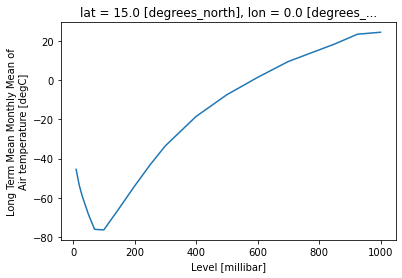

In [12]:
# And make a plot.
ta.isel(lat=30,lon=0,time=0).plot()

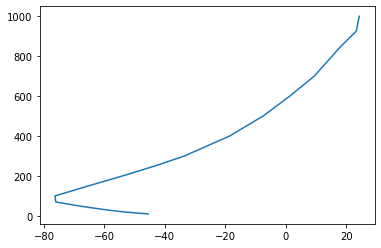

In [16]:
# Let's switch the axes
import matplotlib.pyplot as plt
plt.plot(ta.isel(lat=30,lon=0,time=0),ds1.level)

Text(0, 0.5, 'P (hPa)')

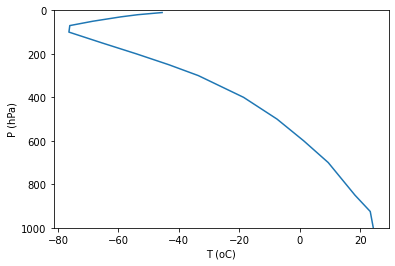

In [18]:
# And modify the axes
lev=ds1.level
plt.ylim(1000,0)
plt.plot(ta.isel(lat=30,lon=0,time=0),lev)
plt.xlabel('T (oC)')
plt.ylabel('P (hPa)')

### Exercise
Now let's read the recent surface temperature data. Find the dataset from the Catalog. It is called NCEP/NCAR Reanalysis.
Please find the path to the data from here:
    https://psl.noaa.gov/data/gridded/  </br>
The variable is called air in the surface directory, and let's look at the values for year 2021 ( air.sig995.2021.nc).

In [22]:
file2='https://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.2021.nc'
with xr.open_dataset(file2) as ds2:      
    print(ds2)
ts=ds2.air

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 1460)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2021-01-01 ... 2021-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:                     COARDS
    title:                           4x daily NMC reanalysis (2014)
    history:                         created 2017/12 by Hoop (netCDF2.3)
    description:                     Data is from NMC initialized reanalysis\...
    platform:                        Model
    dataset_title:                   NCEP-NCAR Reanalysis 1
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    DODS_EXTRA.Unlimited_Dimension:  time


Let's specify time and plot for the last time step.

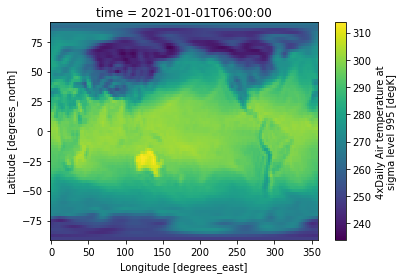

In [23]:
ts.isel(time=1).plot()  # isel is used to specify the index.

### Exercise
Make a plot for the fifth time step.

Let's make a plot for February 1st 00 UTC. To do that, let's first figure out how the time axis is written.

In [ ]:
print(ts.time)

<xarray.DataArray 'time' (time: 156)>
array(['2021-01-01T00:00:00.000000000', '2021-01-01T06:00:00.000000000',
       '2021-01-01T12:00:00.000000000', '2021-01-01T18:00:00.000000000',
       '2021-01-02T00:00:00.000000000', '2021-01-02T06:00:00.000000000',
       '2021-01-02T12:00:00.000000000', '2021-01-02T18:00:00.000000000',
       '2021-01-03T00:00:00.000000000', '2021-01-03T06:00:00.000000000',
       '2021-01-03T12:00:00.000000000', '2021-01-03T18:00:00.000000000',
       '2021-01-04T00:00:00.000000000', '2021-01-04T06:00:00.000000000',
       '2021-01-04T12:00:00.000000000', '2021-01-04T18:00:00.000000000',
       '2021-01-05T00:00:00.000000000', '2021-01-05T06:00:00.000000000',
       '2021-01-05T12:00:00.000000000', '2021-01-05T18:00:00.000000000',
       '2021-01-06T00:00:00.000000000', '2021-01-06T06:00:00.000000000',
       '2021-01-06T12:00:00.000000000', '2021-01-06T18:00:00.000000000',
       '2021-01-07T00:00:00.000000000', '2021-01-07T06:00:00.000000000',
       '2021-

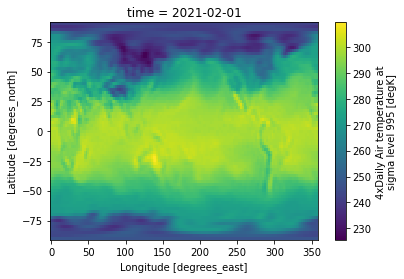

In [24]:
ts.sel(time='2021-02-01T00:00').plot()  # sel is used to specify the axis values

### Exercise
Make a plot for February 7th 18:00 UTC.

We could specify two dimensions and make a line plot. Let's make a plot for a grid point closest to providence. 

/Users/jungeunl/miniconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/jungeunl/miniconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


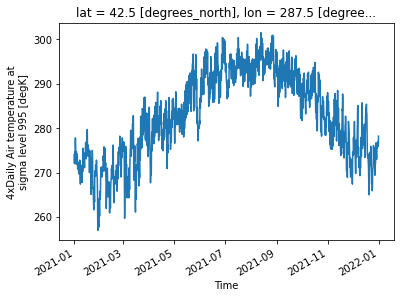

In [27]:
#Plot temperature of a point in January
lat_pvd=41.8
lon_pvd=-71.4+360
ts_prov=ts.sel(lat=lat_pvd,lon=lon_pvd , method='nearest')
ts_prov.plot()

### Exercise
Choose a location that you'd like to look at, and make a line plot.

### Exercise
Plot the vertical distribution of temperature near Providence for the 7th time step (July).